In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
data={
    '真实标签':[1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
    '预测分数':[0.06, 0.37, 0.76, 0.64, 0.55, 0.50, 0.48, 0.94, 0.42, 0.22, 0.13, 0.33, 0.45, 0.09, 0.36]
}
df=pd.DataFrame(data)
df.head(10)

,真实标签,预测分数
0,1,0.06
1,1,0.37
2,0,0.76
3,0,0.64
4,1,0.55
5,1,0.50
6,0,0.48
7,0,0.94
8,1,0.42
9,0,0.22


In [3]:
df_sorted=df.sort_values(by='预测分数',ascending=False)
cumulative_tp=df_sorted['真实标签'].cumsum()
cumulative_fp=(1-df_sorted['真实标签']).cumsum()

In [4]:
cumulative_tp=df_sorted['真实标签'].cumsum()
cumulative_fp=(1-df_sorted['真实标签']).cumsum()

total_tp=cumulative_tp.iloc[-1]
total_fp=cumulative_fp.iloc[-1]

fpr=cumulative_fp/total_fp
tpr=cumulative_tp/total_tp

roc_auc=auc(fpr,tpr)

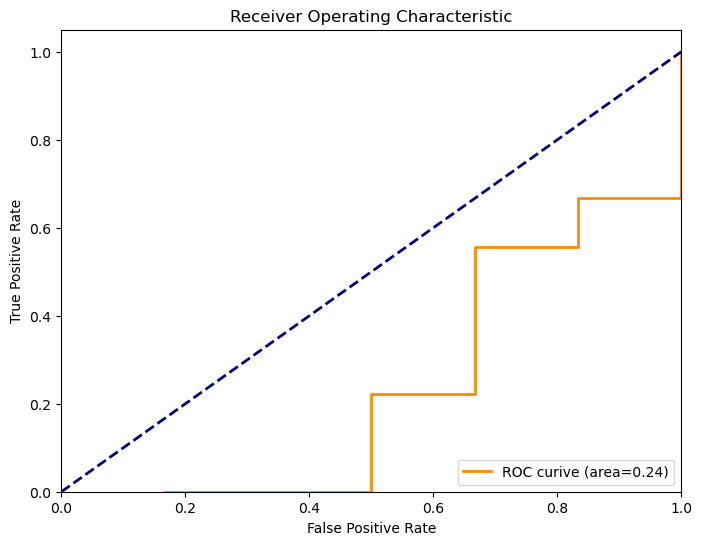

In [5]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curive (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()